In [ ]:
import pandas as pd
import polars as pl
import numpy as np
import scipy.stats as stats

import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date

import datetime as dt

import functime as ft

In [ ]:
df = pl.scan_parquet("calendar.parquet").with_columns(pl.col("date").cast(pl.Date))

df_1 = (
    df
    .select(
        pl.col("date")
        , pl.col("event_name_1").alias("event_name")
        , pl.col("event_type_1").alias("event_type")
        )
    .filter(pl.col("event_name").is_not_null())
).collect()

df_2 = (
    df
    .select(
        pl.col("date")
        , pl.col("event_name_2").alias("event_name")
        , pl.col("event_type_2").alias("event_type")
        )
    .filter(pl.col("event_name").is_not_null())
).collect()

In [ ]:
df_event_name = (
    df_1
    .vstack(df_2)
    .group_by(['date', 'event_name', 'event_type'], maintain_order=True)
    .agg(
        pl.col('event_type').n_unique().alias('event_type_count')
        , pl.col('event_name').n_unique().alias('event_name_count')
        )
    .pivot(index="date", columns="event_name", values="event_name_count")

)

df_type_name = (
    df_1
    .vstack(df_2)
    .group_by(['date', 'event_name', 'event_type'], maintain_order=True)
    .agg(
        pl.col('event_type').n_unique().alias('event_type_count')
        , pl.col('event_name').n_unique().alias('event_name_count')
        )
    .pivot(index="date", columns="event_type", values="event_name_count")

)

df_calendar = df_type_name.join(df_event_name, how="left" , on = 'date').fill_null(0)
df_calendar

date,Sporting,Cultural,National,Religious,SuperBowl,ValentinesDay,PresidentsDay,LentStart,LentWeek2,StPatricksDay,Purim End,OrthodoxEaster,Pesach End,Cinco De Mayo,Mother's day,MemorialDay,NBAFinalsStart,NBAFinalsEnd,Father's day,IndependenceDay,Ramadan starts,Eid al-Fitr,LaborDay,ColumbusDay,Halloween,EidAlAdha,VeteransDay,Thanksgiving,Christmas,Chanukah End,NewYear,OrthodoxChristmas,MartinLutherKingDay,Easter
date,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2011-02-06,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-21,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-03-09,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-03-16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2016-05-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='date'>

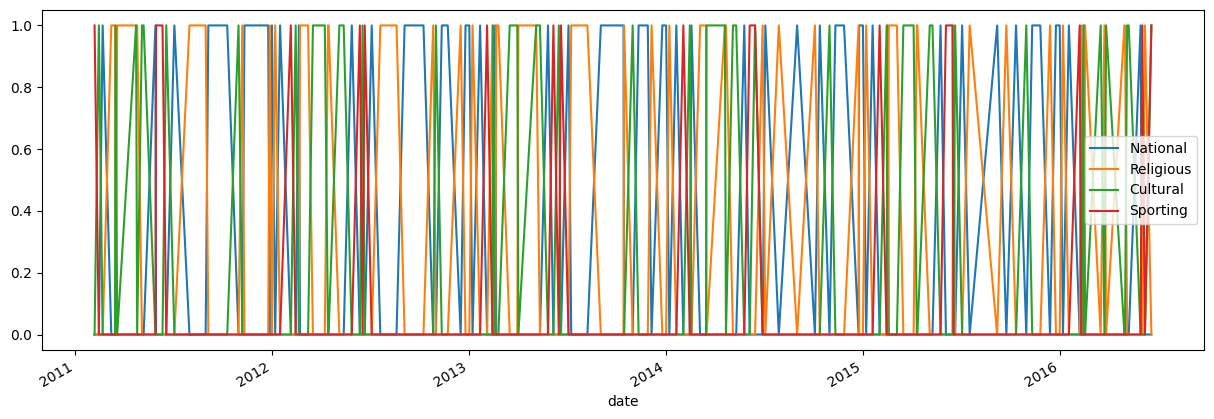

In [ ]:
# create calendar features per and post effects

df_calendar.select(
    pl.col('date')
    ,pl.col('National')
    ,pl.col('Religious')
    ,pl.col('Sporting')
    ,pl.col('Cultural')
    ).to_pandas().plot(
    kind='line', x='date', y=['National','Religious', 'Cultural', 'Sporting'], figsize=(15, 5))

In [ ]:
columns = df_calendar.select(pl.col('*').exclude('date')).columns
columns

['Sporting',
 'Cultural',
 'National',
 'Religious',
 'SuperBowl',
 'ValentinesDay',
 'PresidentsDay',
 'LentStart',
 'LentWeek2',
 'StPatricksDay',
 'Purim End',
 'OrthodoxEaster',
 'Pesach End',
 'Cinco De Mayo',
 "Mother's day",
 'MemorialDay',
 'NBAFinalsStart',
 'NBAFinalsEnd',
 "Father's day",
 'IndependenceDay',
 'Ramadan starts',
 'Eid al-Fitr',
 'LaborDay',
 'ColumbusDay',
 'Halloween',
 'EidAlAdha',
 'VeteransDay',
 'Thanksgiving',
 'Christmas',
 'Chanukah End',
 'NewYear',
 'OrthodoxChristmas',
 'MartinLutherKingDay',
 'Easter']

In [ ]:
post_delta = ['1d','3d','6d','13d', '20d' ]
pre_delta  = ['-1d','-3d','-6d','-13d', '-20d' ]

columns = df_calendar.select(pl.col('*').exclude('date')).columns

df_date = df.select(pl.col('date')).collect()


for idx, column in enumerate(columns):
 
    df_calendar_pre_post = (
        df_calendar
        .select(
            cs.by_name('date', columns[idx])
        )
        .filter(pl.col(columns[idx]) == 1)
        .with_columns(
            [pl.col('date').dt.offset_by(x).alias(f'pre_date_{x}') for x in pre_delta]
        )
        .with_columns(
            [pl.col('date').dt.offset_by(x).alias(f'post_date_{x}') for x in post_delta]
        )
        .with_columns(
            [(pl.date_ranges('date', f'post_date_{x}').alias(columns[idx] + f'_{x}')) for x in post_delta]
        )
        .with_columns(
            [(pl.date_ranges(f'pre_date_{x}','date' ).alias(columns[idx] + f'_{x}')) for x in pre_delta]
        )
        .select(pl.col('*').exclude(
                [
                    f'pre_date_{x}'  for x in pre_delta
                ]
            )
        )
        .select(pl.col('*').exclude(
                [
                    f'post_date_{x}'  for x in post_delta
                ]
            )
        )
    )


    # explode cretated event features 
    # each column represents a time delta wrt the calender feature.
    # each element in the the column is a list of date representing the
    # days (including the column name day) before/after the column day
    date_event_feature = df_calendar_pre_post.select(pl.col('*').exclude('date')).columns
    
    for idx, column in enumerate(date_event_feature):
        
        df_feature = df_calendar_pre_post.select(
            pl.col(column).explode().cast(pl.Date).alias('date'),
            pl.lit(1).alias(column)
            )


        df_date = df_date.join(
            df_feature
            , how = 'left'
            , on = 'date'
        ).unique().fill_null(0)

    
    df_date = df_date.select(
            pl.col('*').exclude(date_event_feature), 
            pl.struct(pl.col(date_event_feature))
            )


df_date


date,Sporting,Cultural,National,Religious,SuperBowl,ValentinesDay,PresidentsDay,LentStart,LentWeek2,StPatricksDay,Purim End,OrthodoxEaster,Pesach End,Cinco De Mayo,Mother's day,MemorialDay,NBAFinalsStart,NBAFinalsEnd,Father's day,IndependenceDay,Ramadan starts,Eid al-Fitr,LaborDay,ColumbusDay,Halloween,EidAlAdha,VeteransDay,Thanksgiving,Christmas,Chanukah End,NewYear,OrthodoxChristmas,MartinLutherKingDay,Easter
date,struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11],struct[11]
2013-03-20,"{0,0,0,0,0,0,0,0,0,0,0}","{0,0,1,1,1,1,0,0,0,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,1,1,1,1,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,1,1}"
2011-07-31,"{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,1,1,1,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,1,1,1,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}"
2014-10-26,"{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,1,1,1}","{0,0,0,0,1,1,0,0,0,0,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,1,1,0,0,0,0,0}","{0,0,0,0,0,0,0,0,1,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}"
2014-02-07,"{0,0,0,1,1,1,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,1,1}","{0,0,0,0,0,1,0,0,0,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,1,1,1,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,1,1}","{0,0,0,0,0,0,0,0,0,1,1}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,0,0,0,0}","{0,0,0,0,0,0,0,

In [ ]:
df_sales = (
    pl.scan_parquet("df_point_of_sale_adj_oos.parquet")
    .with_columns(
        pl.col("date").cast(pl.Date)
    )
)

df_sales.collect().columns

['id', 'date', 'sales', 'zero_sales_ind', 'OOS']

In [ ]:
df_prodloc = (
    pl.scan_parquet("df_prodloc.parquet")
)

In [ ]:
df = (
    df_sales
    #.filter(pl.col('date') >= dt.datetime(2013,1,1))
    .join(
        df_prodloc.select(
            pl.col("id")
            , pl.col("cat_id")
            , pl.col("state_id")
        ), 
        how = 'left'
        , on = 'id'
    )
    .group_by(['date', 'cat_id', 'state_id'])
    .agg(
       pl.col('OOS').sum().alias('OOS_articles')
       , pl.col('sales').sum().alias('sales')
    )
    .join(df_date.lazy(), how = 'left', on = 'date')
    .select(
         pl.concat_str(pl.col('cat_id'),pl.lit('_'),pl.col('state_id')).alias('Cat_state_id')
        , pl.col('date')
        , pl.col('sales')
        , pl.lit(1).cast(pl.Int32).alias('constant')
        , pl.col('*').exclude(
            [
                'cat_id', 'state_id', 'date', 'sales', 'OOS_articles','Sporting',
                'Cultural','National','Religious'
            ]
            )
    )
    .collect()
    
)

df.columns

['Cat_state_id',
 'date',
 'sales',
 'constant',
 'SuperBowl',
 'ValentinesDay',
 'PresidentsDay',
 'LentStart',
 'LentWeek2',
 'StPatricksDay',
 'Purim End',
 'OrthodoxEaster',
 'Pesach End',
 'Cinco De Mayo',
 "Mother's day",
 'MemorialDay',
 'NBAFinalsStart',
 'NBAFinalsEnd',
 "Father's day",
 'IndependenceDay',
 'Ramadan starts',
 'Eid al-Fitr',
 'LaborDay',
 'ColumbusDay',
 'Halloween',
 'EidAlAdha',
 'VeteransDay',
 'Thanksgiving',
 'Christmas',
 'Chanukah End',
 'NewYear',
 'OrthodoxChristmas',
 'MartinLutherKingDay',
 'Easter']

In [ ]:
from functime.seasonality import add_calendar_effects
from functime.offsets import freq_to_sp
from functime.seasonality import add_fourier_terms
from functime.cross_validation import train_test_split
from functime.forecasting import linear_model, auto_elastic_net , lasso, ridge, auto_lightgbm, elastic_net
from functime.preprocessing import diff, scale, boxcox

from functime.conformal import conformalize

In [ ]:
entity_col, time_col, target_col = df.columns[0: 3]
exogenous_col = df.columns[3:]
nested_col = df.columns[4:]

data = (
    df.select([entity_col, time_col, target_col] + exogenous_col)
    .pipe(add_calendar_effects(["weekday"]))
    .pipe(add_fourier_terms(sp=30.44, K=1))
    .pipe(add_fourier_terms(sp=365.25, K=3))
    #.pipe(add_fourier_terms(sp=600, K=1))
    .unnest(nested_col)
    .select(
        pl.col('*').sort_by([entity_col, time_col]),
    )
    .select(
        pl.col("*"),
        pl.col("constant").cum_sum().over([entity_col]).alias("trend"),
    )
    .collect()
)

data

Cat_state_id,date,sales,constant,SuperBowl,SuperBowl_1d,SuperBowl_3d,SuperBowl_6d,SuperBowl_13d,SuperBowl_20d,SuperBowl_-1d,SuperBowl_-3d,SuperBowl_-6d,SuperBowl_-13d,SuperBowl_-20d,ValentinesDay,ValentinesDay_1d,ValentinesDay_3d,ValentinesDay_6d,ValentinesDay_13d,ValentinesDay_20d,ValentinesDay_-1d,ValentinesDay_-3d,ValentinesDay_-6d,ValentinesDay_-13d,ValentinesDay_-20d,PresidentsDay,PresidentsDay_1d,PresidentsDay_3d,PresidentsDay_6d,PresidentsDay_13d,PresidentsDay_20d,PresidentsDay_-1d,PresidentsDay_-3d,PresidentsDay_-6d,PresidentsDay_-13d,PresidentsDay_-20d,…,OrthodoxChristmas_-1d,OrthodoxChristmas_-3d,OrthodoxChristmas_-6d,OrthodoxChristmas_-13d,OrthodoxChristmas_-20d,MartinLutherKingDay,MartinLutherKingDay_1d,MartinLutherKingDay_3d,MartinLutherKingDay_6d,MartinLutherKingDay_13d,MartinLutherKingDay_20d,MartinLutherKingDay_-1d,MartinLutherKingDay_-3d,MartinLutherKingDay_-6d,MartinLutherKingDay_-13d,MartinLutherKingDay_-20d,Easter,Easter_1d,Easter_3d,Easter_6d,Easter_13d,Easter_20d,Easter_-1d,Easter_-3d,Easter_-6d,Easter_-13d,Easter_-20d,weekday,cos_30.44_1,sin_30.44_1,cos_365.25_1,cos_365.25_2,cos_365.25_3,sin_365.25_1,sin_365.25_2,sin_365.25_3,trend
str,date,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,…,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,cat,f64,f64,f64,f64,f64,f64,f64,f64,i32
"""FOODS_CA""",2011-01-29,10101,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""6""",0.789674,-0.613527,-0.837321,0.402214,0.163757,0.546711,-0.915546,0.986501,1
"""FOODS_CA""",2011-01-30,9862,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""7""",-0.776843,-0.629695,-0.979208,0.917695,-0.81802,0.202861,-0.397286,0.57519,2
"""FOODS_CA""",2011-01-31,6944,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""1""",-0.816711,0.577047,-0.951785,0.811789,-0.593511,0.306767,-0.583951,0.804826,3
"""FOODS_CA""",2011-02-01,7864,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""2""",-0.631297,-0.775541,-0.982552,0.930818,-0.846602,0.185987,-0.365484,0.532227,4
"""FOODS_CA""",2011-02-02,7178,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""3""",0.86774,-0.497018,0.46421,-0.569017,-0.992498,-0.885725,-0.822326,0.122261,5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""HOUSEHOLD_WI""",2016-05-18,2236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""3""",0.239161,-0.97098,0.108377,-0.976509,-0.320039,0.99411,0.215477,-0.947404,1937
"""HOUSEHOLD_WI""",2016-05-19,2590,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""4""",-0.480813,-0.876823,-0.344376,-0.76281,0.869764,0.938832,-0.646623,-0.493468,1938
"""HOUSEHOLD_WI""",2016-05-20,2966,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""5""",0.294849,0.955544,0.994226,0.97697,0.948432,0.107308,0.213377,0.316982,1939


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0050dca7-17b3-44cb-a063-ab0f7808e424' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>